In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Fungsi yang akan diminimalkan
def objective_function(x):
    return x**2 - 4*x + 4

In [47]:
# Parameter PSO
num_particles = 4  # Jumlah partikel
num_iterations = 100  # Jumlah iterasi
w = 0.5  # Koefisien inersia
c1 = 1.5  # Koefisien akselerasi untuk pBest
c2 = 1.5  # Koefisien akselerasi untuk gBest

In [48]:
# Inisialisasi posisi dan kecepatan partikel secara acak
np.random.seed(0)  # Untuk reproduktifitas
positions = np.random.rand(num_particles) * 10  # Posisi acak di [0, 10]
velocities = np.random.rand(num_particles) - 0.5  # Kecepatan acak di [-0.5, 0.5]

In [49]:
# Inisialisasi pBest dan gBest
pBest = positions.copy()
pBest_values = objective_function(pBest)
gBest_index = np.argmin(pBest_values)
gBest = pBest[gBest_index]

# Simpan nilai untuk plot
best_values = []

Best position found: 1.9999999976673832
Minimum value: 0.0


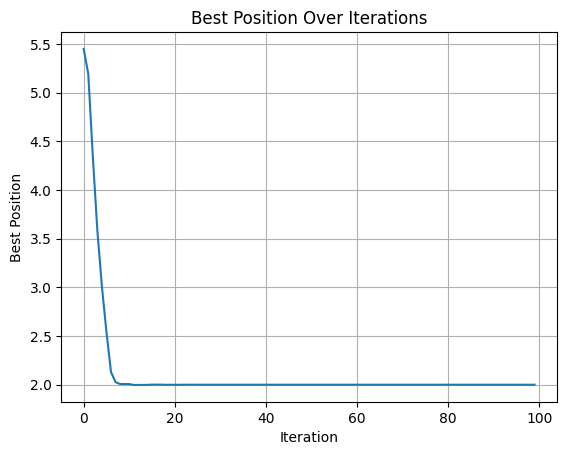

In [50]:
# Iterasi PSO
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Hitung nilai fitness untuk partikel
        fitness = objective_function(positions[i])

        # Update pBest
        if fitness < pBest_values[i]:
            pBest[i] = positions[i]
            pBest_values[i] = fitness

    # Update gBest
    gBest_index = np.argmin(pBest_values)
    gBest = pBest[gBest_index]

    # Simpan nilai terbaik di setiap iterasi
    best_values.append(gBest)

    # Update kecepatan dan posisi
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pBest[i] - positions[i]) +
                         c2 * r2 * (gBest - positions[i]))
        positions[i] += velocities[i]

# Hasil akhir
print(f"Best position found: {gBest}")
print(f"Minimum value: {objective_function(gBest)}")

# Plot pergerakan nilai terbaik
plt.plot(best_values)
plt.title("Best Position Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Best Position")
plt.grid()
plt.show()